# Sentiment Analysis with VADER
Using VADER lexicon we will attempt to analyse the dataset for the sentiments

In [1]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Matthew\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Sentiment Analyzer

In [2]:
sid = SentimentIntensityAnalyzer()

In [3]:
df = pd.read_csv("./data/twitter_training.csv", sep=",", names=["id", "entity", "sentiment", "sentence"])
df

,id,entity,sentiment,sentence
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


## Helper Function

Using polarity scores, we will use the compound score to determine if a sentence is positive, negative, or neutral. Compound score is the sum of positive, neutral, and negative scoring, normalized to -1 to 1.

In [4]:
def sentiment_analyser(sentence: str):
    score = ""

    polarity_score = sid.polarity_scores(sentence)

    if(polarity_score['compound'] > 0):
        score = "Positive"
    elif (polarity_score['compound'] < 0):
        score = "Negative"
    else: # == 0
        score = "Neutral"

    return score

## Data Cleaning

Removing NaN sentences and labels that are irrelevant

In [5]:
df.isna().sum()

id             0
entity         0
sentiment      0
sentence     686
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

id           0
entity       0
sentiment    0
sentence     0
dtype: int64

In [8]:
df = df[df['sentiment'] != "Irrelevant"]

In [9]:
df['sentiment'].value_counts()

Negative    22358
Positive    20655
Neutral     18108
Name: sentiment, dtype: int64

## Analysis

In [10]:
df['sentiment_predicted'] = df['sentence'].apply(lambda x : sentiment_analyser(x))

C:\Users\Matthew\AppData\Local\Temp\ipykernel_18604\254602705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_predicted'] = df['sentence'].apply(lambda x : sentiment_analyser(x))


In [11]:
df

,id,entity,sentiment,sentence,sentiment_predicted
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,Negative
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,Negative
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,Negative
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,Negative
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,Negative
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Positive
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Negative
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Negative
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,Positive


## Evaluation

In [12]:
df['sentiment_predicted'].value_counts()

Positive    27450
Negative    22681
Neutral     10990
Name: sentiment_predicted, dtype: int64

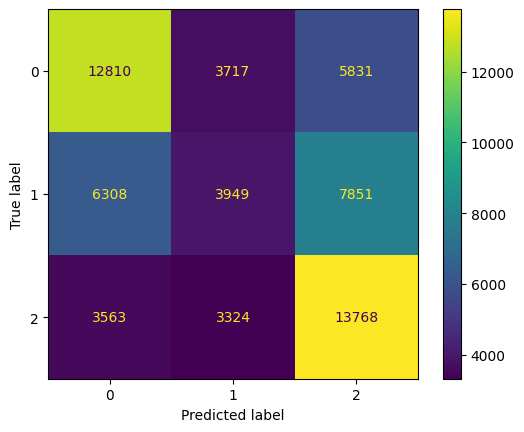

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(df['sentiment'], df['sentiment_predicted'])
ConfusionMatrixDisplay(cm).plot()